## Análise Exploratória de Dados para Séries Temporais

## Tratamentos de Dados Ausentes para Séries Temporais<br>
Média Móvel <br>
Interpolação Lineal <br>
Interpolação Polinomial <br>

## Suavização 
Motivos
Técnicas (MM, Exponencial, Log(?), etc)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import math

In [2]:
df = pd.read_csv('EuStockMarkets.csv')
df

,DAX,SMI,CAC,FTSE
0,1628.75,1678.1,1772.8,2443.6
1,1613.63,1688.5,1750.5,2460.2
2,1606.51,1678.6,1718.0,2448.2
3,1621.04,1684.1,1708.1,2470.4
4,1618.16,1686.6,1723.1,2484.7
...,...,...,...,...
1855,5460.43,7721.3,3939.5,5587.6
1856,5285.78,7447.9,3846.0,5432.8
1857,5386.94,7607.5,3945.7,5462.2
1858,5355.03,7552.6,3951.7,5399.5


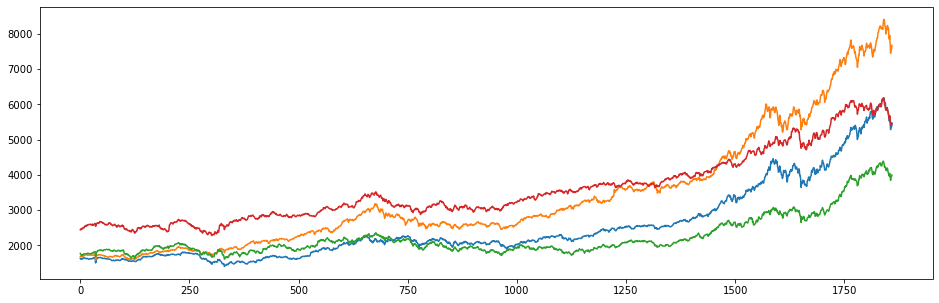

In [3]:
plt.figure(figsize= (16, 5))
plt.plot(df)

Em séries temporais um **histograma da diferença dos dados** costuma ser mais interessante que o **histograma dos dados não transformados**:

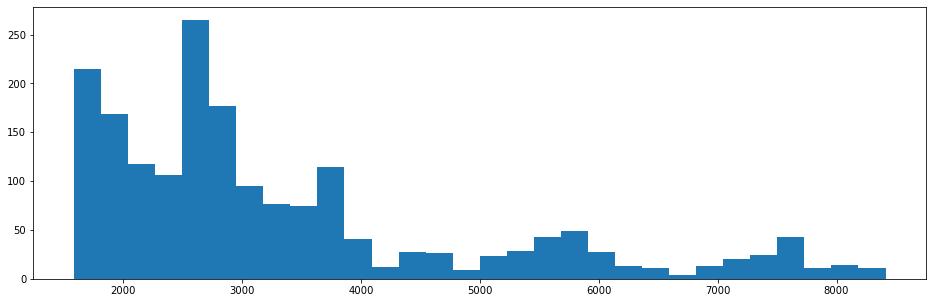

In [4]:
#O histograma de dados não transformados é bastante amplo e não mostra uma distribuição normal
plt.figure(figsize= (16, 5))
plt.hist(df['SMI'],30)
plt.show()

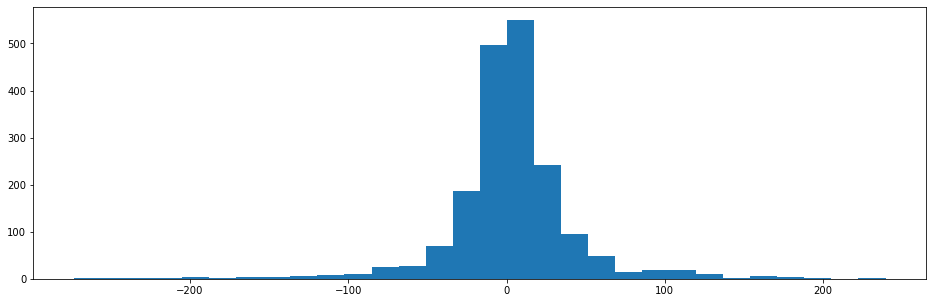

In [5]:
#Diferenciamos os dados para remover a tendência e isso nos traz uma distribuição normal
plt.figure(figsize= (16, 5))
plt.hist(np.diff(df['SMI']),30)
plt.show()

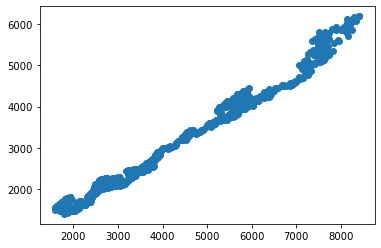

In [6]:
#Valores de Duas Ações ao Longo do Tempo
plt.scatter(df['SMI'],df['DAX'])
plt.show()

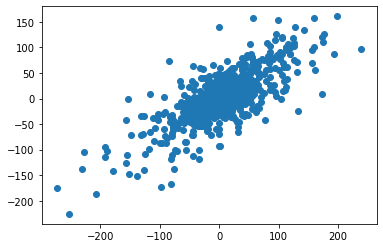

In [7]:
#Valores das Mudanças Diárias de Ações ao Longo do Tempo
plt.scatter(np.diff(df['SMI']),np.diff(df['DAX']))
plt.show()

Olhando para esses gráficos de dispersão simples temos a impressão de que as variáveis estão fortemente correlacionadas, mas isso não é verdade. Vejamos o gráfico de dispersão quando aplicamos um lag de um dia:

In [8]:
df['SMI_LAG'] = df['SMI'].shift(-1)
df

,DAX,SMI,CAC,FTSE,SMI_LAG
0,1628.75,1678.1,1772.8,2443.6,1688.5
1,1613.63,1688.5,1750.5,2460.2,1678.6
2,1606.51,1678.6,1718.0,2448.2,1684.1
3,1621.04,1684.1,1708.1,2470.4,1686.6
4,1618.16,1686.6,1723.1,2484.7,1671.6
...,...,...,...,...,...
1855,5460.43,7721.3,3939.5,5587.6,7447.9
1856,5285.78,7447.9,3846.0,5432.8,7607.5
1857,5386.94,7607.5,3945.7,5462.2,7552.6
1858,5355.03,7552.6,3951.7,5399.5,7676.3


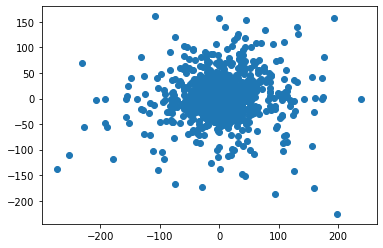

In [9]:
plt.scatter(np.diff(df['SMI_LAG']),np.diff(df['DAX']))
plt.show()

A **correlação some** quando aplicamos um **lag de tempo**, indicando que o SMI **não parece predizer** o DAX!

## Estacionariedade

Estacionariedade ocorre quando média e variância permanecem estáveis ao longo do tempo.

Os testes estatísticos de estacionariedade muitas vezes se resumem em identificar se existe uma raíz unitária - isto é, se 1 é uma solução da equação característica do processo.

Uma série temporal não é estacionária se houver uma raiz unitária. Embora a falta de uma raiz unitária não comprove a estacionariedade. 

Determinar se um processo tem uma raiz unitária continua sendo uma área de pesquisa ativa. 

No entanto, aqui utilizaremos o teste de **Dickey-Fuller Aumentado (ADF)** para essa verificação.

In [10]:
df = pd.read_csv('AirPassengers.csv', names=['Date', 'Passengers'], header=None)
df= df.set_index('Date')
df

,Passengers
Date,
1949-01,112
1949-02,118
1949-03,132
1949-04,129
1949-05,121
...,...
1960-08,606
1960-09,508
1960-10,461


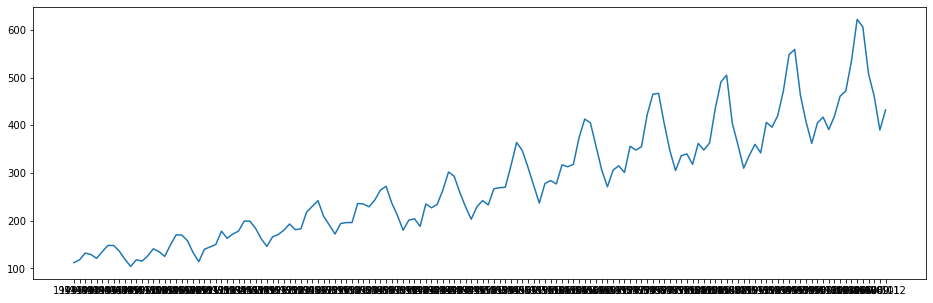

In [11]:
plt.figure(figsize= (16, 5))
plt.plot(df)

Acima temos uma série não estacionária, uma vez que a média e a variância estão visivelmente mudando ao longo do tempo. Muitas vezes nossa intuição ao observar o gráfico de uma série temporal pode nos enganar. Para isso existe o teste **ADF** como veremos a seguir.

## Augmented Dickey-Fuller Test

In [12]:
from statsmodels.tsa.stattools import adfuller

In [13]:
result = adfuller(df.values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


Falha em rejeitar H0, aceita-se H1, isso é, há evidências de que a série é não-estacionária e sua média/variância tem relação com o tempo. Assim como verificamos intuitivamente acima ao plotar o gráfico.

## Autocorrelação

É a ideia de que um valor em uma série temporal em um determinado ponto no tempo pode estar correlacionado com o valor em outro ponto no tempo.

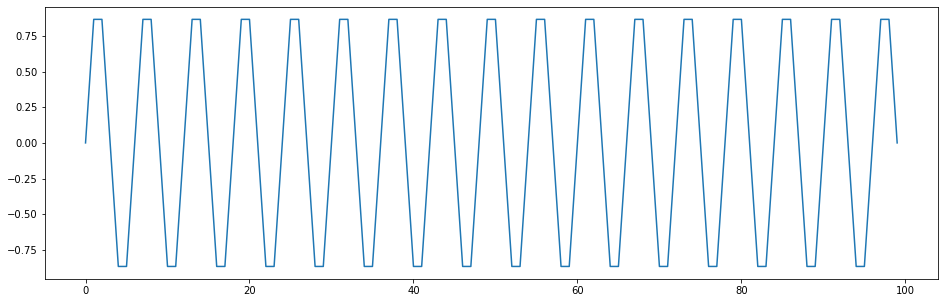

In [14]:
#Utilizando a Função de Seno de X (de 1 a 100) 
s = np.arange(100)
s = np.sin(s * math.pi /3)
plt.figure(figsize= (16, 5))
plt.plot(s)

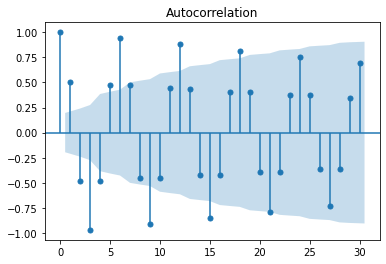

In [15]:
#Autocorrelação
plot_acf(s, lags = 30)
plt.show()

**Em toda série temporal**, assim como na série acima, **quando o lag é 0 a correlação será 1**. <br>
**Nessa série** em **lag 1 tem-se a correlação de 0,5** por se tratar de uma série **senoidal**. <br>
Em **lag 2** a **correlação é -0,5**. <br>

Vamos explicar didaticamente o que ocorreu aqui. <br>
Vamos criar colunas em função da coluna **N** onde cada uma corresponde à **N** "atrasado" em **t**:

In [16]:
df = {'N' : s}
df =  pd.DataFrame(df)
df

,N
0,0.000000e+00
1,8.660254e-01
2,8.660254e-01
3,1.224647e-16
4,-8.660254e-01
...,...
95,-8.660254e-01
96,-3.918870e-15
97,8.660254e-01
98,8.660254e-01


In [17]:
df['N-1'] = df['N'].shift(1)
df['N-2'] = df['N'].shift(2)
df['N-3'] = df['N'].shift(3)
df['N-4'] = df['N'].shift(4)
df['N-5'] = df['N'].shift(5)
df['N-6'] = df['N'].shift(6)
df['N-7'] = df['N'].shift(7)
df['N-8'] = df['N'].shift(8)
df['N-9'] = df['N'].shift(9)
df['N-10'] = df['N'].shift(10)
df = df.fillna(0)
df

,N,N-1,N-2,N-3,N-4,N-5,N-6,N-7,N-8,N-9,N-10
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,8.660254e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,8.660254e-01,8.660254e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
3,1.224647e-16,8.660254e-01,8.660254e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
4,-8.660254e-01,1.224647e-16,8.660254e-01,8.660254e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
95,-8.660254e-01,-8.660254e-01,7.349119e-15,8.660254e-01,8.660254e-01,3.431487e-15,-8.660254e-01,-8.660254e-01,1.420962e-14,8.660254e-01,8.660254e-01
96,-3.918870e-15,-8.660254e-01,-8.660254e-01,7.349119e-15,8.660254e-01,8.660254e-01,3.431487e-15,-8.660254e-01,-8.660254e-01,1.420962e-14,8.660254e-01
97,8.660254e-01,-3.918870e-15,-8.660254e-01,-8.660254e-01,7.349119e-15,8.660254e-01,8.660254e-01,3.431487e-15,-8.660254e-01,-8.660254e-01,1.420962e-14
98,8.660254e-01,8.660254e-01,-3.918870e-15,-8.660254e-01,-8.660254e-01,7.349119e-15,8.660254e-01,8.660254e-01,3.431487e-15,-8.660254e-01,-8.660254e-01


In [18]:
#Depois de inserir lags na réplica da série N, vamos calcular a correlação entre as colunas:
corr = df.corr()
corr.round(1)

,N,N-1,N-2,N-3,N-4,N-5,N-6,N-7,N-8,N-9,N-10
N,1.0,0.5,-0.5,-1.0,-0.5,0.5,1.0,0.5,-0.5,-1.0,-0.5
N-1,0.5,1.0,0.5,-0.5,-1.0,-0.5,0.5,1.0,0.5,-0.5,-1.0
N-2,-0.5,0.5,1.0,0.5,-0.5,-1.0,-0.5,0.5,1.0,0.5,-0.5
N-3,-1.0,-0.5,0.5,1.0,0.5,-0.5,-1.0,-0.5,0.5,1.0,0.5
N-4,-0.5,-1.0,-0.5,0.5,1.0,0.5,-0.5,-1.0,-0.5,0.5,1.0
N-5,0.5,-0.5,-1.0,-0.5,0.5,1.0,0.5,-0.5,-1.0,-0.5,0.5
N-6,1.0,0.5,-0.5,-1.0,-0.5,0.5,1.0,0.5,-0.5,-1.0,-0.5
N-7,0.5,1.0,0.5,-0.5,-1.0,-0.5,0.5,1.0,0.5,-0.5,-1.0
N-8,-0.5,0.5,1.0,0.5,-0.5,-1.0,-0.5,0.5,1.0,0.5,-0.5
N-9,-1.0,-0.5,0.5,1.0,0.5,-0.5,-1.0,-0.5,0.5,1.0,0.5


Verifique que, conforme o gráfico de Autocorrelação plotado acima, você pode visualizar na tabela que quando o lag entre N e a réplica de N é 1, a correlação é 0,5. Quanto o lag é 2, a correlação é -0,5. Quanto o lag é 3 a correlação é -1 e assim sucessivamente.

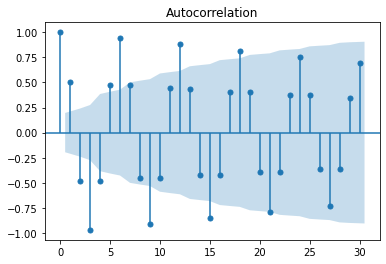

In [20]:
#Utilizando Novamente a Função de Seno de X (de 1 a 100) 
s = np.arange(100)
s = np.sin(s * math.pi /3)
plot_acf(s, lags = 30)
plt.show()

A PACF mostra quais pontos de dados são informativos e quais são os pontos harmônicos em períodos de tempo mais curtos.

**Dados Não Estacionários**

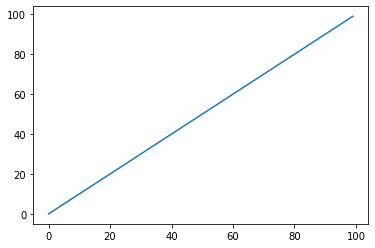

In [21]:
#Autocorrelação Parcial
#Vamos visualizar o comportamento da ACF e PACF para dados que possuem tendência
x = np.arange(100)
plt.plot(x)

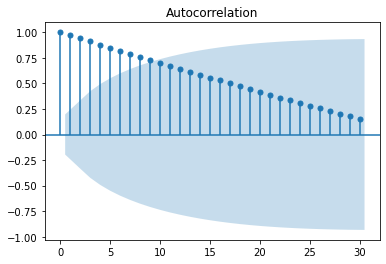

In [22]:
#Autocorrelação
plot_acf(x, lags = 30)
plt.show()

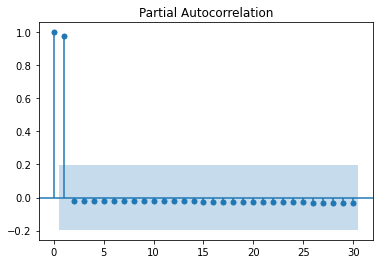

In [25]:
#Autocorrelação Parcial
plot_pacf(x, lags = 30)
plt.show()

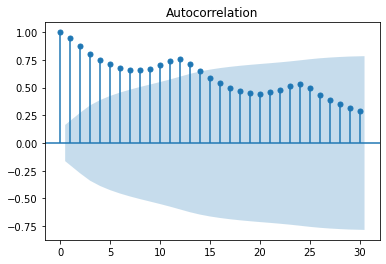

In [27]:
df = pd.read_csv('AirPassengers.csv', names=['Date', 'Passengers'], header=None)
plot_acf(df['Passengers'], lags = 30)
plt.show()

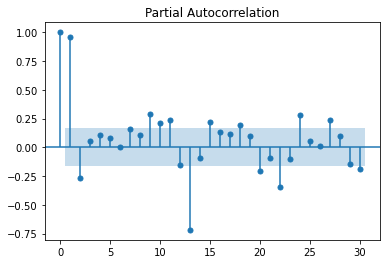

In [28]:
plot_pacf(df['Passengers'], lags = 30)
plt.show()

**Correlações Espúrias**

Devemos ser cautelosos antes de afirmar que há correlação entre as séries de dados, no entanto, mesmo que análises estatísticas aponte para tal. Correlações não são necessariamente causalidades. Duas variáveis podem ter uma relação entre si mas, muitas vezes, não é possível – nem faz sentido – estabelecer uma relação de causa e efeito entre elas. Verifique curiosas correlações espúrias no site abaixo:

https://www.tylervigen.com/spurious-correlations

**Um truque muito utilizado para forçar a correlação entre as variáveis é somar cumulativamente as quantidades**. Vamos usar a base 'populacao_renda_per_capita' para exemplificar esta prática e como ela interfere na correlação.

In [155]:
df = pd.read_csv('populacao_renda_per_capita.csv')
df = df.set_index('Ano')
df

,Populacao,Renda Per Capita
Ano,,
1995,10000,547
1996,11000,629
1997,12000,627
1998,13000,694
1999,14000,585
2000,15000,627
2001,16000,654
2002,17000,784
2003,18000,772


Verifique que, nesta base, a **população** aumenta em **1.000** unidades ao ano. Enquanto isso, a **renda per capita** foi gerada usando um número **randômico entre 500 e 800**. Vamos calcular a correlação entre as séries:

In [59]:
df.corr()

,Populacao,Renda Per Capita
Populacao,1.0000,-0.0324
Renda Per Capita,-0.0324,1.0000


Como era de se esperar, o teste confirmou a **ausência de correlação** entre as séries.

Agora vamos usar o **truque de acumular os dados para forçar a afirmação da correlação**:

In [156]:
df['Populacao'] = df['Populacao'].cumsum()
df['Renda Per Capita'] = df['Renda Per Capita'].cumsum()

In [157]:
df

,Populacao,Renda Per Capita
Ano,,
1995,10000,547
1996,21000,1176
1997,33000,1803
1998,46000,2497
1999,60000,3082
2000,75000,3709
2001,91000,4363
2002,108000,5147
2003,126000,5919


In [62]:
df.corr()

,Populacao,Renda Per Capita
Populacao,1.000000,0.986712
Renda Per Capita,0.986712,1.000000


Verifique que agora, a correlação calculada é de 98,67%. <br>No entanto, as séries não são verdadeiramente correlacionadas. <br>
Por isso, a análise das relações entre as variáveis vai muito além do cálculo de correlação em si. <br> É necessário conhecimento teórico sobre os dados para não gerar correlações espúrias e usar a estatística para afirmar informações falsas.

**Cointegração**

A Cointegração se refere a uma relação real entre duas séries temporais. 

Deste modo, o primeiro passo para a aplicação da cointegração consiste na verificação da existência de raiz unitária nas séries estudadas, o que pode ser feito por meio dos testes **Dickey-Fulley (DF)** e **Dickey-Fulley Aumentado (ADF)**, os quais consideram como hipótese nula a presença de raiz unitária nos dados, indicando não estacionariedade. <br>
Outro teste utilizado com essa finalidade é o teste de **Kwiatkowski–Phillips–Schmidt–Shin (KPSS)**, que considera como hipótese nula a ausência de raiz unitária, indicando que a série é estacionária. <br>
Com a informação sobre a ordem de integração de cada série envolvida na análise, aplica-se o procedimento de **Johansen** para testar a existência de relação de longo prazo entre as variáveis. <br>

Vamos analisar o conhecido exemplo do **pedestre bêbabo e seu cachorro**. Se medirmos as caminhadas dos dois separadamente elas são aleatórias. Mas o pedestre e o cachorro nunca se afastam muito um do outro.  


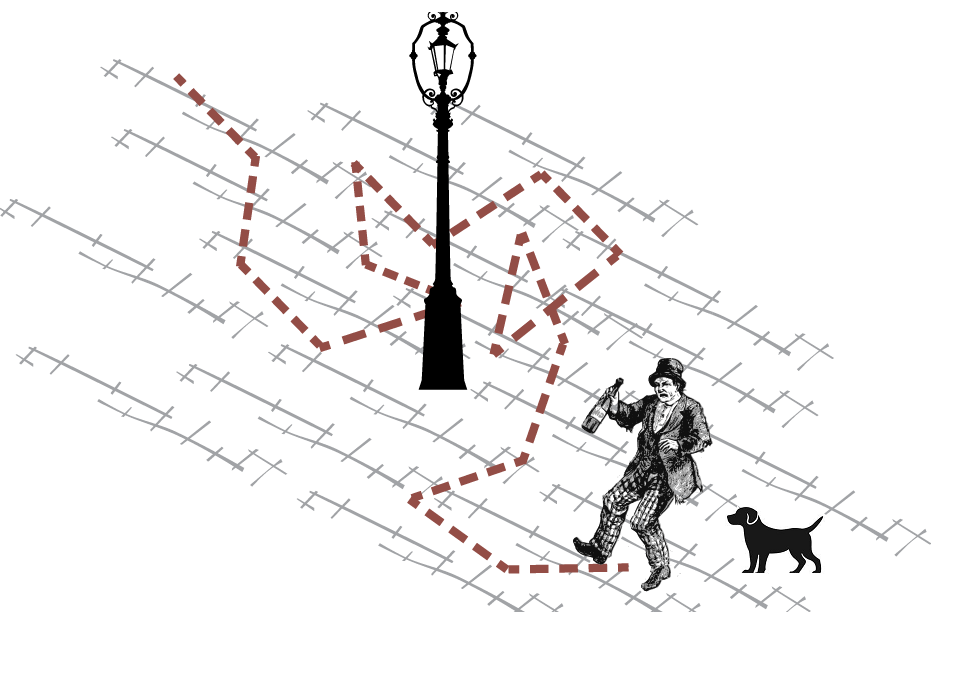

In [153]:
df = pd.read_csv('drunk_walk.csv')
df

,drunk_walk,dog_walk
0,72,76
1,99,103
2,41,44
3,86,91
4,66,67
...,...,...
95,63,64
96,31,32
97,53,57
98,53,56


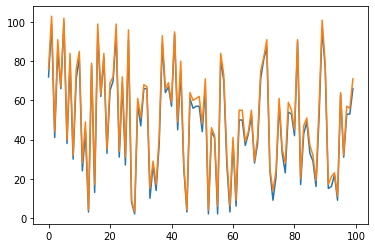

In [103]:
plt.plot(df)
plt.show()

In [104]:
result = adfuller(df['drunk_walk'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.980704
p-value: 0.000000
Critical Values:
	1%: -3.500
	5%: -2.892
	10%: -2.583


In [105]:
result = adfuller(df['dog_walk'].values)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -6.049557
p-value: 0.000000
Critical Values:
	1%: -3.500
	5%: -2.892
	10%: -2.583


In [106]:
df.corr()

,drunk_walk,dog_walk
drunk_walk,1.00000,0.99878
dog_walk,0.99878,1.00000


In [107]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

In [108]:
df = pd.DataFrame({'x':df['drunk_walk'],'y':df['dog_walk']})
df

,x,y
0,72,76
1,99,103
2,41,44
3,86,91
4,66,67
...,...,...
95,63,64
96,31,32
97,53,57
98,53,56


In [158]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

"""
    Johansen cointegration test of the cointegration rank of a VECM

    Parameters
    ----------
    endog : array_like (nobs_tot x neqs)
        Data to test
    det_order : int
        * -1 - no deterministic terms - model1
        * 0 - constant term - model3
        * 1 - linear trend
    k_ar_diff : int, nonnegative
        Number of lagged differences in the model.
        
    Returns
    -------
    result: Holder
    An object containing the results which can be accessed using dot-notation. The object’s attributes are

    eig: (neqs) - Eigenvalues.
    evec: (neqs x neqs) - Eigenvectors.
    lr1: (neqs) - Trace statistic.
    lr2: (neqs) - Maximum eigenvalue statistic.
    cvt: (neqs x 3) - Critical values (90%, 95%, 99%) for trace statistic.
    cvm: (neqs x 3) - Critical values (90%, 95%, 99%) for maximum eigenvalue statistic. 
    method: str “johansen”
    r0t: (nobs x neqs) - Residuals for Δ𝑌.
    rkt: (nobs x neqs) - Residuals for 𝑌−1.
    ind: (neqs) - Order of eigenvalues.
    """

def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')


# model with constant/trend (deterministic) term with lags set to 1
joh_model = coint_johansen(df,0,1) # k_ar_diff +1 = K
joh_output(joh_model)

   max_eig_stat  trace_stat
0      5.057202    5.058935
1      0.001733    0.001733 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]] 



Tanto o teste de Autovalores (max_eig_stat) quanto o Trace Test (trace_stat) rejeitam h0, a hipótese nula de que não existe relação de cointegração a longo prazo das variáveis. Portanto, há indícios, sim, de cointegração.

Retornemos, portanto, à base **'populacao_renda_per_capita.csv'**, faremos o mesmo procedimento de acumular os valores das séries mas testaremos a cointegração desta vez.

In [162]:
df = pd.read_csv('populacao_renda_per_capita.csv')
df = df.set_index('Ano')
df.head()

,Populacao,Renda Per Capita
Ano,,
1995,10000,547
1996,11000,629
1997,12000,627
1998,13000,694
1999,14000,585


In [163]:
df['Populacao'] = df['Populacao'].cumsum()
df['Renda Per Capita'] = df['Renda Per Capita'].cumsum()
df.head()

,Populacao,Renda Per Capita
Ano,,
1995,10000,547
1996,21000,1176
1997,33000,1803
1998,46000,2497
1999,60000,3082


In [164]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

"""
    Johansen cointegration test of the cointegration rank of a VECM

    Parameters
    ----------
    endog : array_like (nobs_tot x neqs)
        Data to test
    det_order : int
        * -1 - no deterministic terms - model1
        * 0 - constant term - model3
        * 1 - linear trend
    k_ar_diff : int, nonnegative
        Number of lagged differences in the model.
        
    Returns
    -------
    result: Holder
    An object containing the results which can be accessed using dot-notation. The object’s attributes are

    eig: (neqs) - Eigenvalues.
    evec: (neqs x neqs) - Eigenvectors.
    lr1: (neqs) - Trace statistic.
    lr2: (neqs) - Maximum eigenvalue statistic.
    cvt: (neqs x 3) - Critical values (90%, 95%, 99%) for trace statistic.
    cvm: (neqs x 3) - Critical values (90%, 95%, 99%) for maximum eigenvalue statistic. 
    method: str “johansen”
    r0t: (nobs x neqs) - Residuals for Δ𝑌.
    rkt: (nobs x neqs) - Residuals for 𝑌−1.
    ind: (neqs) - Order of eigenvalues.
    """

def joh_output(res):
    output = pd.DataFrame([res.lr2,res.lr1],
                          index=['max_eig_stat',"trace_stat"])
    print(output.T,'\n')
    print("Critical values(90%, 95%, 99%) of max_eig_stat\n",res.cvm,'\n')
    print("Critical values(90%, 95%, 99%) of trace_stat\n",res.cvt,'\n')


# model with constant/trend (deterministic) term with lags set to 1
joh_model = coint_johansen(df,0,1) # k_ar_diff +1 = K
joh_output(joh_model)

   max_eig_stat  trace_stat
0      5.057202    5.058935
1      0.001733    0.001733 

Critical values(90%, 95%, 99%) of max_eig_stat
 [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]] 

Critical values(90%, 95%, 99%) of trace_stat
 [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]] 



Agora o teste não rejeita H0, a hipótese nula de que não existe relação de cointegração a longo prazo das variáveis. Portanto, não há indícios de cointegração entre as séries.

**Modelos Estatísticos para Séries Temporais**